[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 255 127 127]
 [127 127 127 ... 127 127 191]
 [127 127 127 ... 127 191 255]]


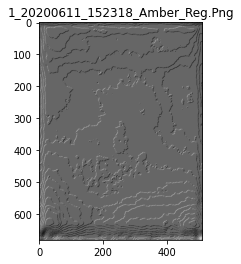

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [ 63 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 191 ... 127 127 127]]


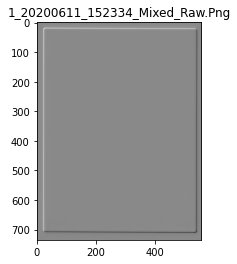

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


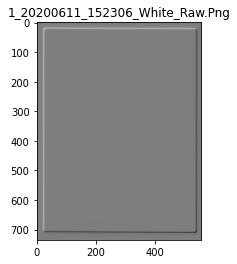

[[127 191 127 ... 127  63 127]
 [255 191 127 ... 127 127 191]
 [191 127 127 ... 127 127 127]
 ...
 [127 127 127 ...   0   0  63]
 [127 127 127 ...  63 127 127]
 [127 127 127 ... 127 127 127]]


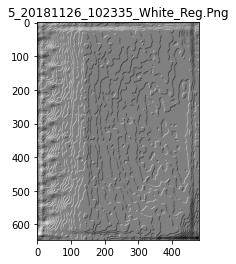

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


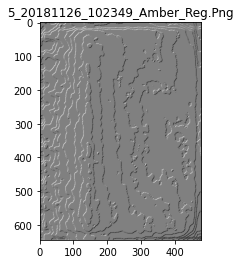

[[  0  63 127 ... 127 127 127]
 [ 63 127 191 ... 127 127 127]
 [191 255 127 ... 127 127 127]
 ...
 [127 127 127 ... 191 255 255]
 [127 127 127 ... 255 255 127]
 [127 127 127 ... 255 191 127]]


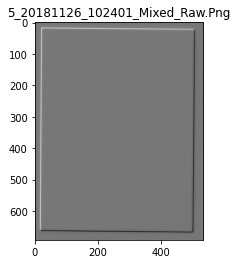

[[127 127 127 ... 127 127 127]
 [127 127 127 ...  63  63  63]
 [127 127 127 ...   0  63  63]
 ...
 [127 127 127 ... 127 191 191]
 [127 127 127 ... 191 255 191]
 [127 127 127 ... 191 191 127]]


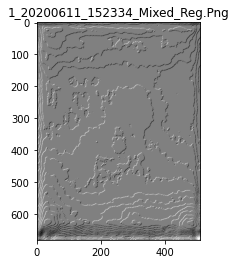

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [191 191 191 ... 127 127 127]
 ...
 [127 127  63 ... 127 127 127]
 [ 63  63 127 ... 127 127 127]
 [127 191 127 ... 127 127 127]]


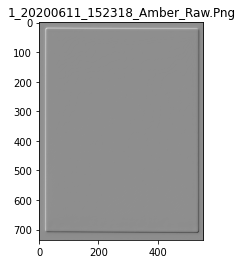

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 255 191 191]
 [127 127 127 ... 255 191 255]
 [127 127 127 ... 191 191 191]]


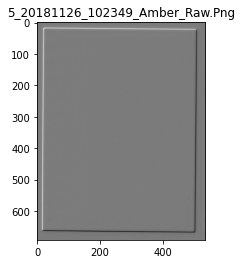

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127  63  63]
 [127 127 127 ...   0   0  63]
 [127 127 127 ...  63 127 127]]


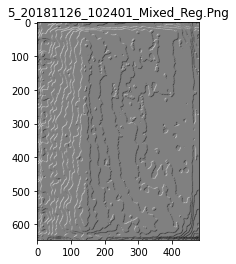

[[127 191 191 ... 127 127 127]
 [127 191 127 ...  63  63  63]
 [127 127  63 ...  63  63  63]
 ...
 [191 191 191 ... 191 191 191]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


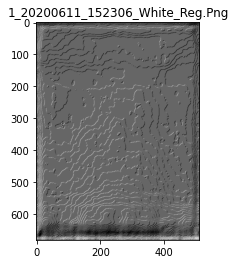

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 191 255 255]
 [127 127 127 ... 255 255 127]
 [127 127 127 ... 255 191 127]]


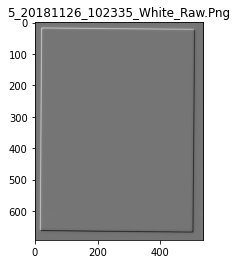

In [133]:
import cv2 as cv
import glob, os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/Neo3333/ECE-271A
#https://github.com/Neo3333/ECE-271A/blob/master/hw1/hw1intro.pdf
#https://github.com/Neo3333/ECE-271A/blob/master/Lecture%20Notes/BDT.pdf


path = '/Users/estepark/Documents/week6_fri/Images'
results = '/Users/estepark/Documents/week6_fri/results'
kern = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]

for fname in glob.glob(path+'/*.Png'):
    serNum = fname.split('/')[6] 
    img  = cv.imread(fname)
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imgFilt = cv.bilateralFilter(imgray, 15, 75, 75)
    diag_img = signal.convolve2d(imgFilt, np.array(kern), boundary='symm', mode='same')
    diag_cpy = (((diag_img+2))/4*255).astype(np.uint8) #bc min=-2 and max=+2

    print(diag_cpy)
    plt.figure()
    plt.title(serNum)
    plt.imshow(diag_img, cmap="gray")
    plt.show()
    cv.imwrite(os.path.join(results, serNum), diag_cpy)
    


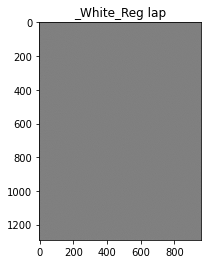

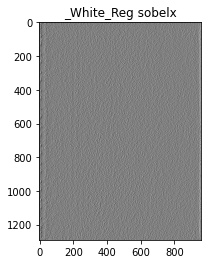

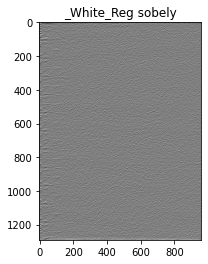

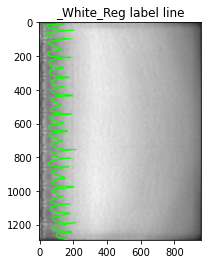

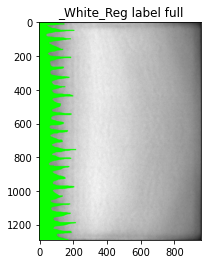

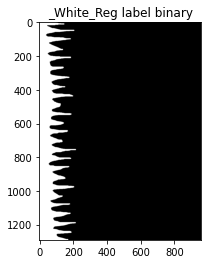

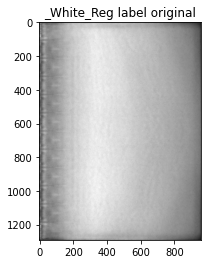

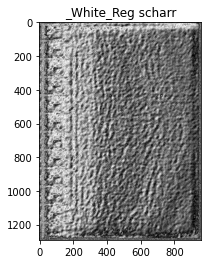

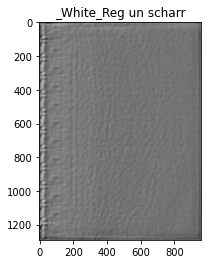

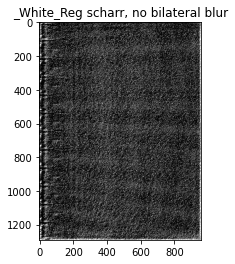

In [142]:
#labels =  '/Users/estepark/Documents/week9_tues/label'
annotations = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/label'
originals = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/results'

for fname in glob.glob(annotations+'/*.png'):
    serNum = fname.split('/')[-1][:-4] 
    
    annotation  = cv.imread(fname) # green line annotated label
    annotation_full = np.copy(annotation)
    annotation_binary = np.zeros(annotation.shape[:2])
    
    for i in range(annotation.shape[0]): 
        for j in range(annotation.shape[1])[::-1]:
            if annotation[i][j][0] == annotation[i][j][1] == annotation[i][j][2]:
                continue
            else:
                annotation_full[i][0:j][:] = annotation_full[i][j][:]
                annotation_binary[i][0:j] = 1
                break
    
    original = cv.imread(originals+'/{}.png'.format(serNum), cv.IMREAD_GRAYSCALE) # original label without annotation
    imgFilt = cv.bilateralFilter(original, 15, 75, 75)
    diag_img = signal.convolve2d(imgFilt, np.array(kern), boundary='symm', mode='same') # scharr filter 
    scharr = (((diag_img+2))/4*255).astype(np.uint8) #normalize after scharr, bc min=-2 and max=+2
    
    diag_img_test = signal.convolve2d(original, np.array(kern), boundary='symm', mode='same') # scharr filter 
    scharr_test = (((diag_img_test+2))/4).astype(np.uint8) #normalize after scharr, bc min=-2 and max=+2
    
    laplacian = cv.Laplacian(scharr_test,cv.CV_64F)
    sobelx = cv.Sobel(scharr_test,cv.CV_64F,1,0,ksize=5)
    sobely = cv.Sobel(scharr_test,cv.CV_64F,0,1,ksize=5)
    
    original = (original-np.min(original))/(np.max(original) - np.min(original)) # normalize label [0,1]
    
    plt.figure()
    plt.title(serNum+' lap')
    plt.imshow(laplacian,cmap="gray")
    plt.show()
    
    
    plt.figure()
    plt.title(serNum+' sobelx')
    plt.imshow(sobelx,cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' sobely')
    plt.imshow(sobely,cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label line')
    plt.imshow(annotation)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label full')
    plt.imshow(annotation_full)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label binary')
    plt.imshow(annotation_binary, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label original')
    plt.imshow(original, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' scharr')
    plt.imshow(scharr, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' un scharr')
    plt.imshow(diag_img, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' scharr, no bilateral blur')
    plt.imshow(scharr_test, cmap="gray")
    plt.show()

In [131]:
import scipy.fftpack
def dct2d(a):
    """
    input: 1D dct
    output: 2D dct
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.dct.html
    dct from scipy can only do 1 dim, so here to make it a 2dim, first run on 1 dim then next
    so thats why is axis=0 (horizontal), then axis=1 (veritcal)
    """
    return scipy.fftpack.dct(scipy.fftpack.dct( a, axis=0, norm='ortho' ),axis=1,norm='ortho')
n = 0

print("img rows {}".format(original.shape[0]))
print("img cols {}".format(original.shape[1]))

# if (img.shape[0]%8 !=0):
#     floorX = math.floor(img.shape[0]/8)
#     if (img.shape[1]% 8!=0 ):
#         floorY = math.floor(img.shape[1]/8)
# imgCrop = img[0:floorX*8, 0:floorY*8 ]
ch_dct = []
not_dct = []
bad_ch = 0
bad_not = 0 


"""
input: for every column correponding, apply sliding window to image to every row
output: create sliding window to take 0->8, then 1->9, then 2->10 of the lable
fn: what:
    how:
    why:
"""
for i in range(original.shape[0]-7): 
    for j in range(original.shape[1]-7): 
        patch = original[i:i+8, j:j+8] # this is the oringal Lv image matrix
        scharr_patch = scharr[i:i+8,j:j+8]
        """
        flatten the 8x8 return matrix of dct2 of dct coefficients
        """
        vec = dct2d(patch).flatten()
        #print(i,',',j,':',vec)
        """
        checking if 1st value in patch2 is same as the rest for uniformity
        if it is uniform, then leave out in the calc of mean and cov
            by appending into bad_ch
            can think of dct has output scores of uniformity
            if has same color/textures, then it's uniform and can be left off
        if include uniform patches, then return value of dct2d, will be huge value for 1st and skews the rest
        """
        if np.all(scharr_patch == scharr_patch[0][0]): 
            #print(i,',',j,':',vec)
            if annotation_binary[i,j] == 1: 
                """
                bad_ch can very well be a ch pixel, but its a uniform ch so we ignore it
                bad_not is not ch
                """
                bad_ch += 1
            else: 
                bad_not += 1 
            continue
        if annotation_binary[i,j] == 1: 
            ch_dct.append(vec)
        else: 
            not_dct.append(vec)
        assert patch.shape == (8,8)
        n = n + 1
print(n)
#print(label.shape[0]*label.shape[1])
print('bad ch = {}, bad not = {}'.format(bad_ch, bad_not))




img rows 1291
img cols 961
1224671
bad ch = 0, bad not = 265


In [127]:
ch_dct = np.array(ch_dct)
not_dct = np.array(not_dct)
print(ch_dct.shape)
print(not_dct.shape)

(143411, 64)
(1081260, 64)


In [102]:
np.mean(ch_dct, axis=0)

array([ 4.41223611e+00, -2.87901869e-02, -8.75048369e-04, -3.60154080e-03,
       -2.71350914e-04, -1.10720272e-03, -1.03947999e-04, -2.78231901e-04,
        4.90806150e-03,  2.50681972e-04, -4.09258170e-06,  2.33107101e-05,
       -3.13679977e-06,  3.59023946e-06,  4.52800013e-07, -1.10841315e-07,
       -1.14532136e-04,  2.46777168e-05,  8.86934695e-07,  5.02357732e-07,
       -1.32941171e-07, -2.70919576e-06,  4.38241028e-07,  9.47490405e-07,
        4.55819115e-04,  1.39970758e-05, -6.73349040e-06,  2.54366821e-06,
       -1.33614974e-06,  5.18624933e-07,  1.09467969e-06,  6.14379889e-07,
       -8.10162920e-05,  6.27385401e-06, -3.52051998e-06,  9.88429411e-07,
       -7.24641545e-07, -7.33916208e-07,  9.32883054e-07,  3.32010124e-07,
        1.34099488e-04, -1.68098344e-06, -6.53530825e-07,  6.66308455e-07,
        1.59290830e-06, -4.12785101e-07,  4.77637652e-07,  6.24338255e-08,
       -4.92040263e-05, -2.02098618e-06, -1.92709836e-06,  2.94031245e-07,
       -8.03275260e-07,  

In [103]:
np.mean(not_dct, axis=0)

array([ 5.86073837e+00,  5.94977802e-03, -4.03185685e-04,  6.75292015e-04,
       -1.11058703e-04,  2.11168453e-04, -3.87347383e-05,  5.42191927e-05,
        1.09895238e-03, -3.21670951e-05,  4.23507076e-07, -2.85560467e-06,
        3.06922034e-07, -2.99143185e-07,  1.29985325e-07, -1.10906870e-07,
       -3.35105416e-04, -6.22317160e-06, -1.56166769e-07, -1.36750019e-07,
        1.19315629e-07,  3.25695755e-07, -2.04747205e-07, -1.51487050e-07,
        7.32758961e-05, -1.44196402e-06,  1.21506190e-06,  5.80867246e-08,
        1.54352702e-07, -9.60869049e-08, -2.75730806e-07, -3.95023518e-09,
       -1.36428524e-04, -1.82371760e-06,  4.90479273e-07, -5.82456059e-08,
        9.88316826e-08,  6.46025814e-08,  2.55073988e-08,  5.05452260e-08,
        5.86941740e-06,  3.02773888e-07,  1.83282251e-07, -6.00319266e-08,
       -1.07908667e-07,  1.12657842e-08, -5.91885374e-08,  2.27601246e-08,
       -5.25783156e-05,  6.17063906e-08,  4.00936868e-07, -1.04579662e-07,
        7.71808654e-08, -

In [112]:
foreground = ch_dct
background = not_dct
print(ch_dct.shape[1] )
print(ch_dct.shape[0])
total = ch_dct.shape[0] + not_dct.shape[0]
print(total==n)

# suspected that valid ch has lower probability considering 
# it takes less area of the total image
# P_Y=y
prior_ch = ch_dct.shape[0]/ total
# P_X=x
prior_chNot = not_dct.shape[0]/ total
print("Probability RV Y=valid ch: {}".format(prior_ch))
print("Probability RV X=invalid ch: {}".format(prior_chNot))


64
143411
True
Probability RV Y=valid ch: 0.11710165424020003
Probability RV X=invalid ch: 0.8828983457598


In [118]:
#MLE for background
mean_BG = np.mean(background,axis = 0)
var_BG = np.var(background,axis = 0)
se_BG = np.sqrt(var_BG)
# background trasnpose, it needs to be transposed to correctly compute the convariance
#cov needs to be 64x64 matrix, how much ea dim varies wrt ever otehr dim, so diag will be the var of ea dim
# can think of cov as how 1 rv varies with the other
cov_BG = np.cov(background.T)

In [119]:
#MLE for foreground
N = foreground.shape[0] # nubmer of rows in valid ch mat 
base_FG = np.zeros(foreground.shape[1]) + (-N/2 * np.log(2 * np.pi))
mean_FG = np.mean(foreground,axis = 0)
var_FG = np.var(foreground,axis = 0)
se_FG = np.sqrt(var_FG)
cov_FG = np.cov(foreground.T)


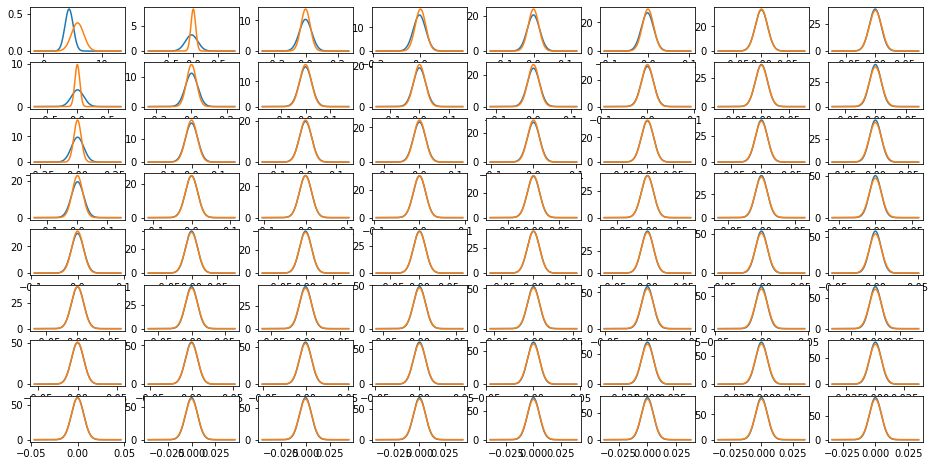

In [129]:
#marginal density plot
from scipy.stats import norm
from scipy.special import kl_div
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,8))
KL_distance = []

#with the labelled img, plotting prob density fn of all indecies of dct starting at 0 index
# where blue is FG and orange is BG
for i in range(foreground.shape[1]):
    fig.add_subplot(8,8,i+1)
    x_FG = np.linspace(mean_FG[i] - 7 * se_FG[i] ,mean_FG[i] + 7 * se_FG[i],500)
    x_BG = np.linspace(mean_BG[i] - 7 * se_BG[i], mean_BG[i] + 7 * se_BG[i],500)
    
    x = np.sort(np.array([x_FG,x_BG]),axis = None)
    
    y_FG = norm.pdf(x,mean_FG[i],se_FG[i])
    y_BG = norm.pdf(x,mean_BG[i],se_BG[i])
    
    plt.plot(x,y_FG,x,y_BG)
#     title = "Fit result for the %d feature" %(i+1)
#     plt.title(title)
plt.show()

In [ ]:
A_matrix = np.reshape(A,(638,473))

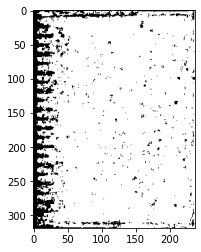

In [40]:
A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
plt.figure()
plt.imshow(A_matrix, cmap="gray")
plt.show()

In [33]:
len(scores)

23

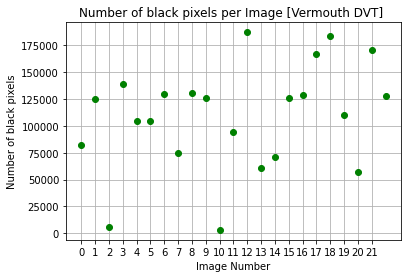

In [44]:
#started this at 3am, ended at 7am, and there's 23 images
plt.plot(scores, 'go')
plt.xticks(np.arange(0, 22, step=1))
plt.xlabel("Image Number")
plt.ylabel("Number of black pixels")
plt.title("Number of black pixels per Image [Vermouth DVT] ")
plt.grid()
plt.show()

/Users/estepark/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/estepark/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


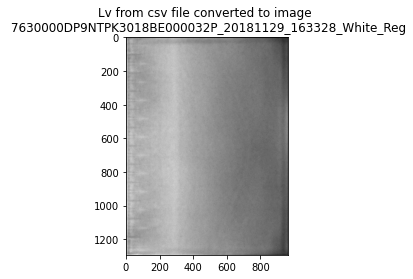

rows
643
cols
478
-----
number of white pxiels: 20233


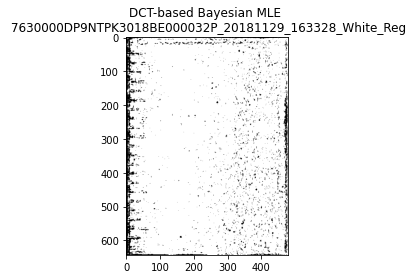

628.8627083301544


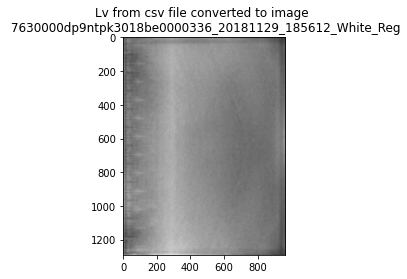

KeyboardInterrupt: 

In [132]:
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

#path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'
path = '/Users/estepark/Documents/week11_mon/Vermouth_EVT/20181129D EVT EDN1-A/20181129/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresEVT= []

for fname in glob.glob(path+'/*.csv'):
    A=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()

            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch

            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) 
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i))
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresEVT.append(sumWhite)

    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    

    end = time.time()
    print(end - start)
    

In [48]:
len(scoresEVT)

32

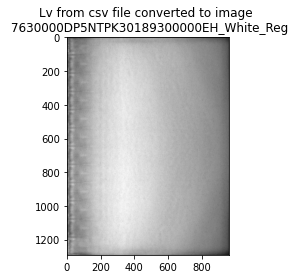

rows
642
cols
477
-----
number of white pxiels: 23135


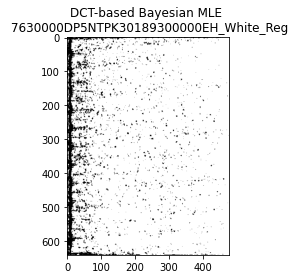

605.9551253318787


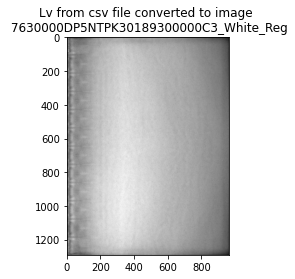

rows
642
cols
477
-----
number of white pxiels: 21571


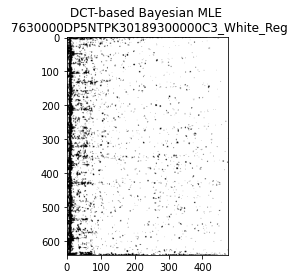

1243.938894033432


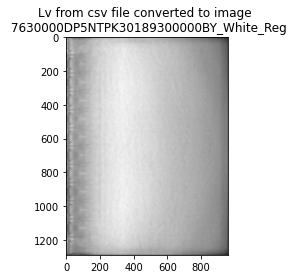

rows
641
cols
476
-----
number of white pxiels: 14210


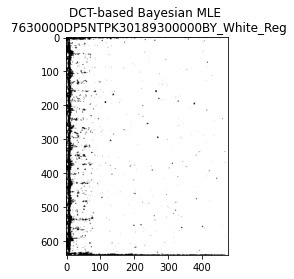

1869.609230041504


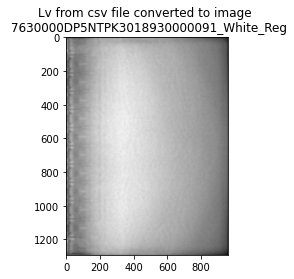

rows
642
cols
477
-----
number of white pxiels: 14678


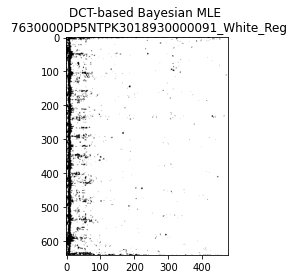

2480.840543985367


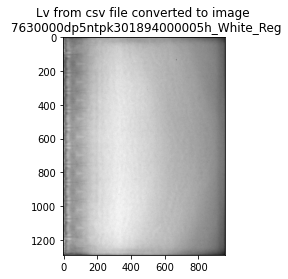

rows
641
cols
477
-----
number of white pxiels: 10690


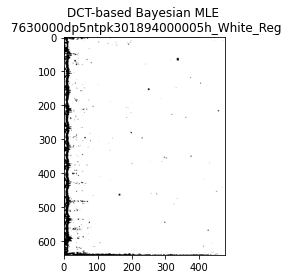

3082.275691986084


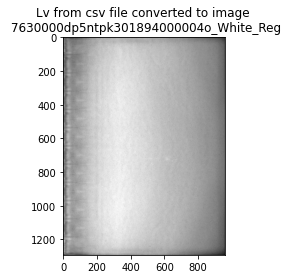

rows
642
cols
477
-----
number of white pxiels: 23202


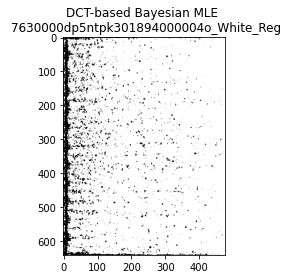

3689.5043971538544


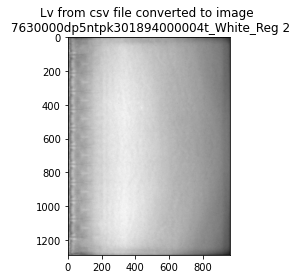

rows
641
cols
477
-----
number of white pxiels: 9339


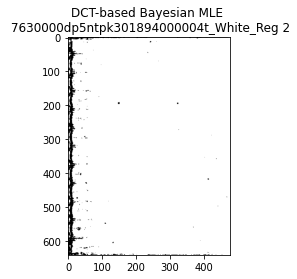

4297.56244301796


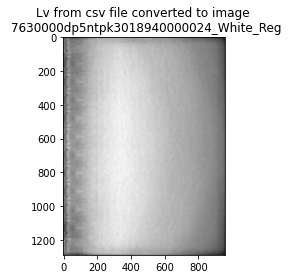

rows
641
cols
477
-----
number of white pxiels: 13123


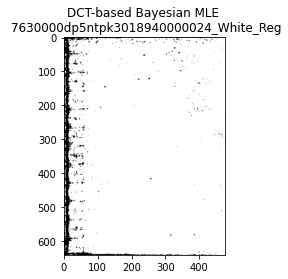

4904.123330116272


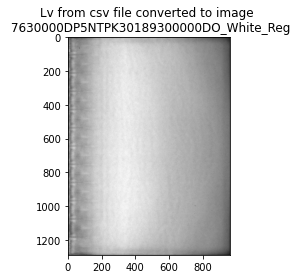

rows
641
cols
477
-----
number of white pxiels: 15091


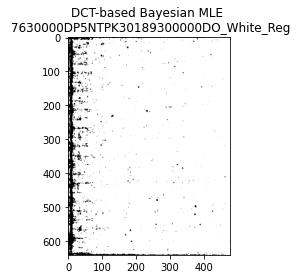

5505.604312181473


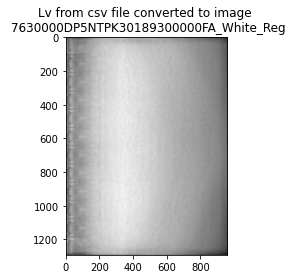

rows
642
cols
477
-----
number of white pxiels: 12376


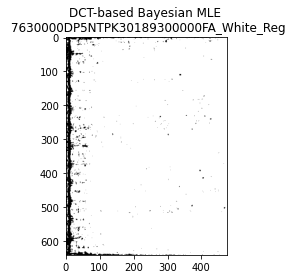

6119.441831111908


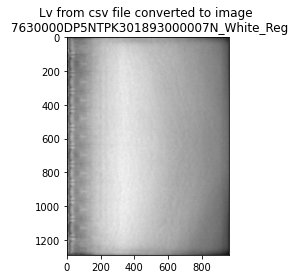

rows
641
cols
477
-----
number of white pxiels: 23838


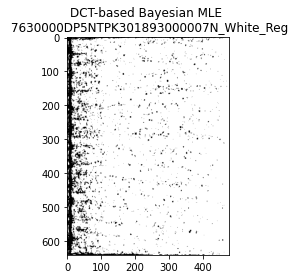

6728.8930559158325


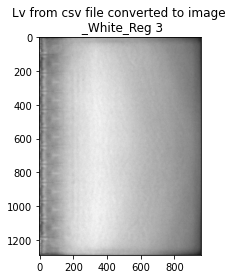

rows
641
cols
477
-----
number of white pxiels: 13166


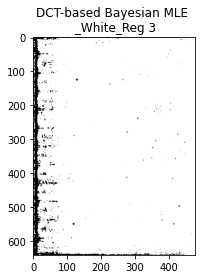

7339.725440979004


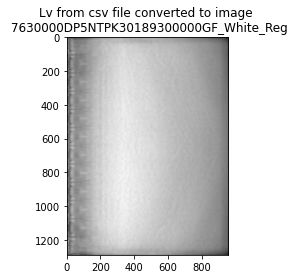

rows
641
cols
476
-----
number of white pxiels: 22501


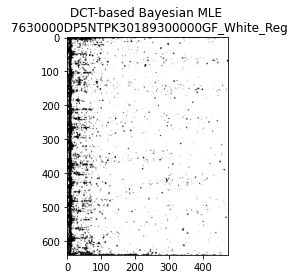

7951.0660490989685


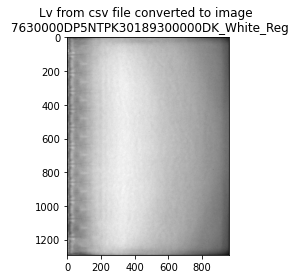

rows
642
cols
477
-----
number of white pxiels: 11629


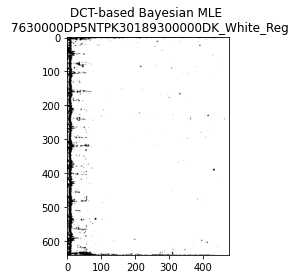

8564.834270238876


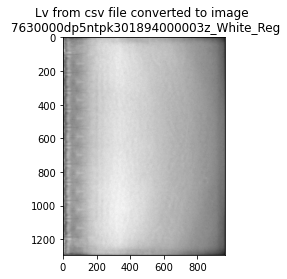

rows
643
cols
478
-----
number of white pxiels: 11425


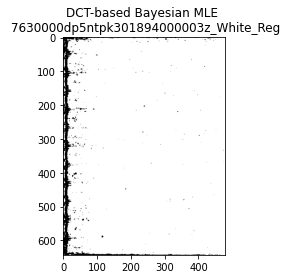

9180.542927026749


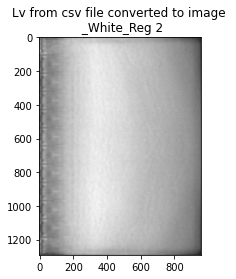

rows
642
cols
477
-----
number of white pxiels: 19619


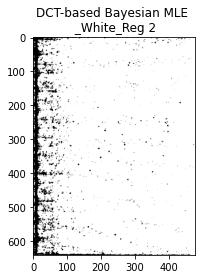

9804.13741016388


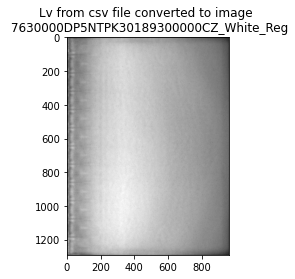

rows
642
cols
477
-----
number of white pxiels: 11564


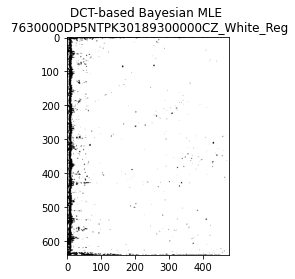

10417.58689713478


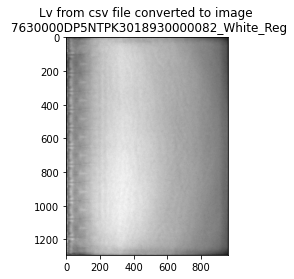

rows
642
cols
477
-----
number of white pxiels: 12377


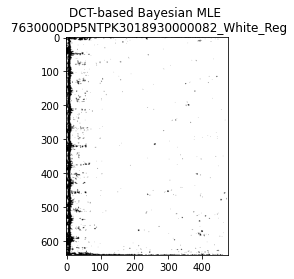

11030.087485313416


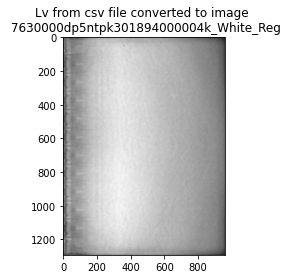

rows
642
cols
477
-----
number of white pxiels: 12863


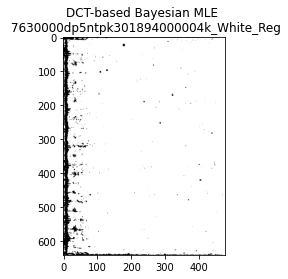

11646.669437170029


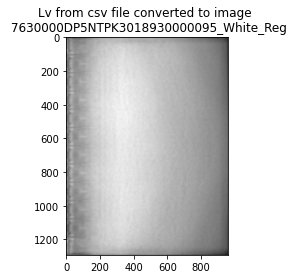

rows
642
cols
477
-----
number of white pxiels: 10578


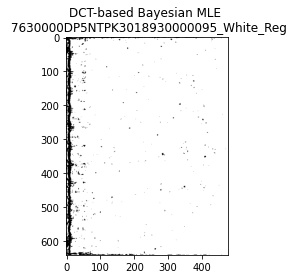

12257.771172046661


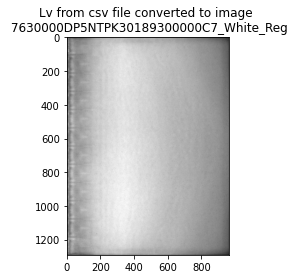

rows
642
cols
477
-----
number of white pxiels: 11485


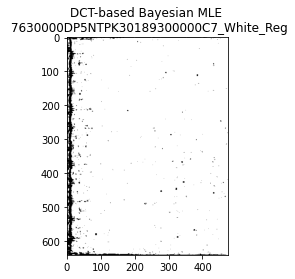

12854.587973117828


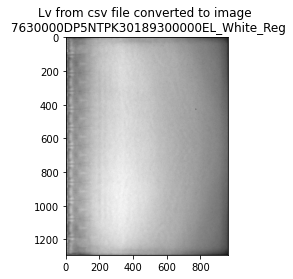

rows
642
cols
477
-----
number of white pxiels: 11443


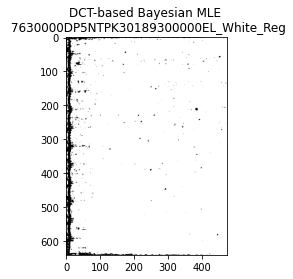

13475.094372034073


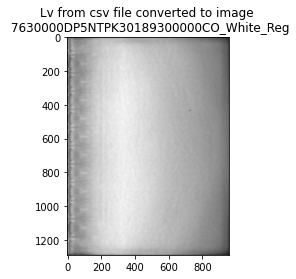

rows
641
cols
477
-----
number of white pxiels: 11263


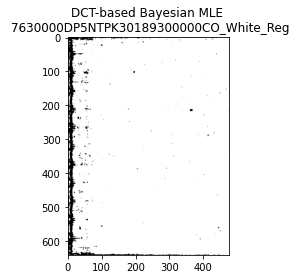

14081.117561101913


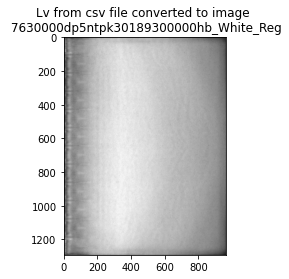

rows
642
cols
477
-----
number of white pxiels: 17786


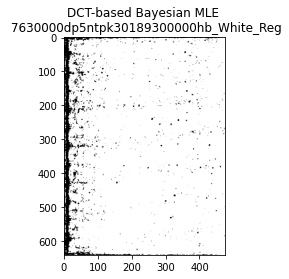

14686.774379968643


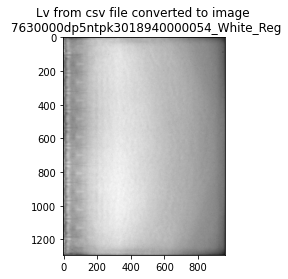

rows
642
cols
477
-----
number of white pxiels: 10982


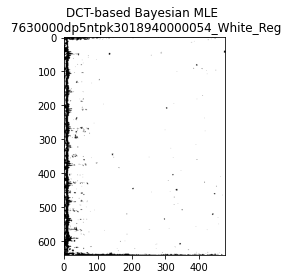

15295.018465995789


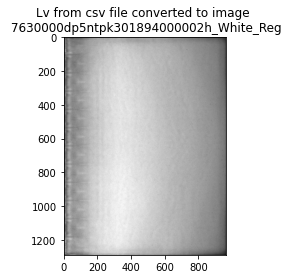

rows
641
cols
477
-----
number of white pxiels: 17109


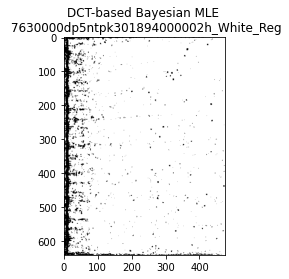

15902.480173110962


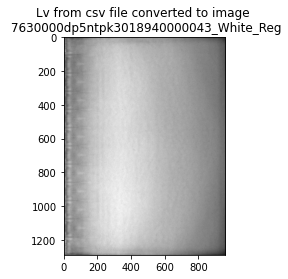

rows
641
cols
476
-----
number of white pxiels: 13124


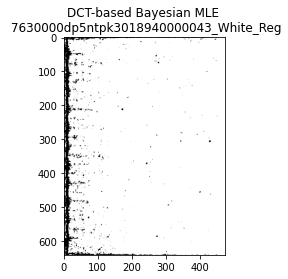

16509.302331209183


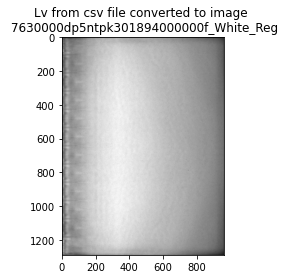

rows
641
cols
476
-----
number of white pxiels: 12343


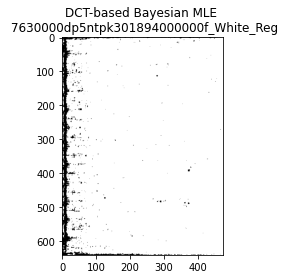

17117.724132061005


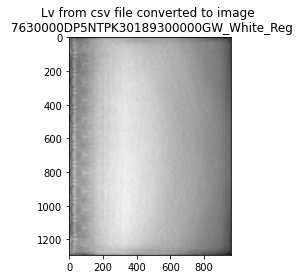

rows
642
cols
477
-----
number of white pxiels: 9683


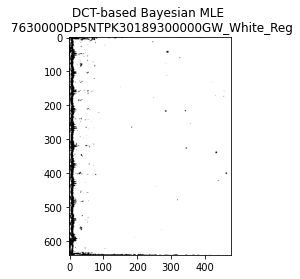

17725.355941057205


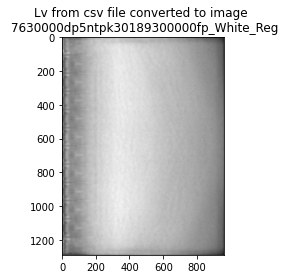

rows
641
cols
476
-----
number of white pxiels: 17213


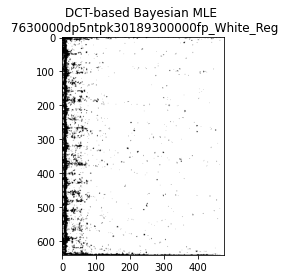

18331.244807243347


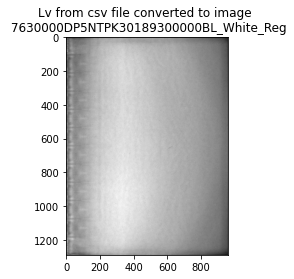

rows
641
cols
476
-----
number of white pxiels: 14711


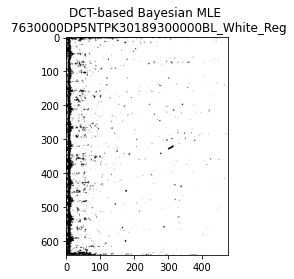

18937.235948085785


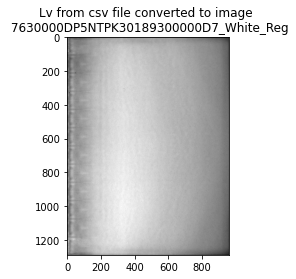

rows
641
cols
476
-----
number of white pxiels: 11901


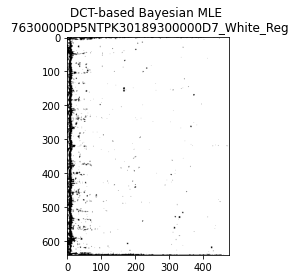

19543.822417259216


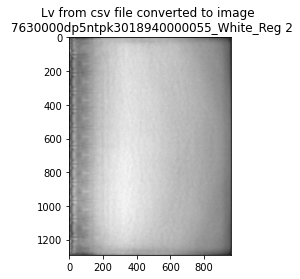

KeyboardInterrupt: 

In [54]:
# hvt
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

#path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'
path = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresHVT= []

for fname in glob.glob(path+'/*.CSV'):
    A=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresHVT.append(sumWhite)

    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    

    end = time.time()
    print(end - start)
    

In [51]:
path = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/White'
os.path.isdir(path)

True

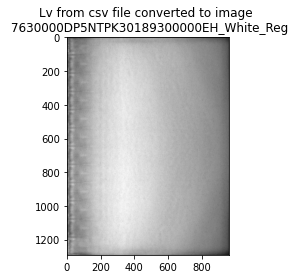

rows
642
cols
477
-----
number of white pxiels: 24675


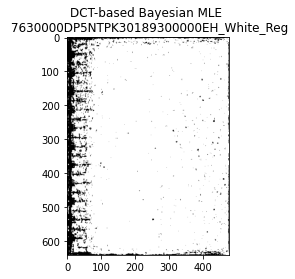

632.7761859893799


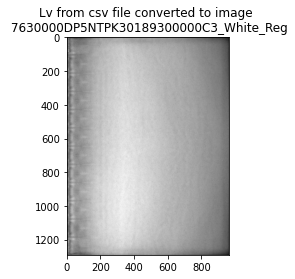

rows
642
cols
477
-----
number of white pxiels: 23455


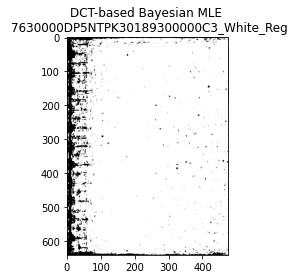

1267.4091668128967


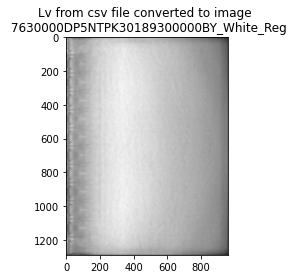

rows
641
cols
476
-----
number of white pxiels: 18977


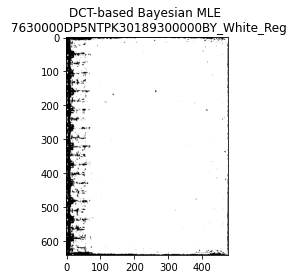

1898.0262501239777


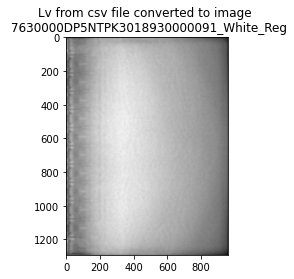

rows
642
cols
477
-----
number of white pxiels: 22129


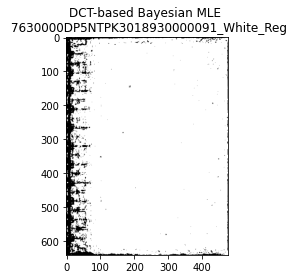

2527.2599000930786


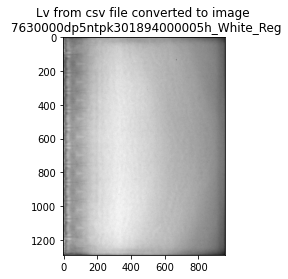

rows
641
cols
477
-----
number of white pxiels: 16593


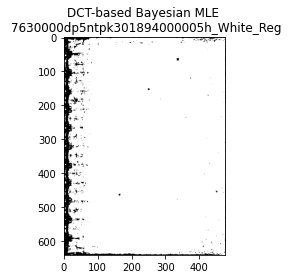

3150.331484079361


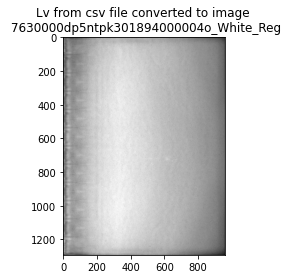

rows
642
cols
477
-----
number of white pxiels: 22317


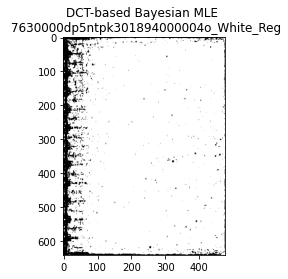

3778.917667865753


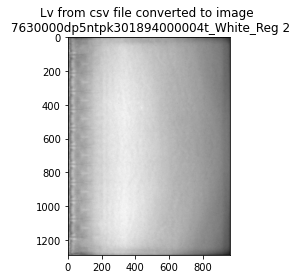

rows
641
cols
477
-----
number of white pxiels: 14985


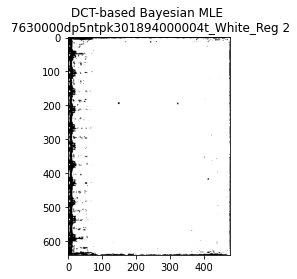

4451.051638126373


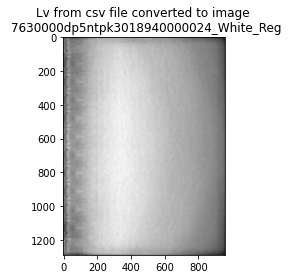

rows
641
cols
477
-----
number of white pxiels: 19943


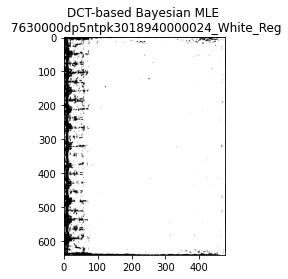

5065.0284061431885


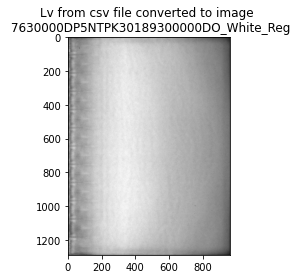

KeyboardInterrupt: 

In [79]:
# hvt
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

#path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'
path = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresHVT= []

for fname in glob.glob(path+'/*.CSV'):
    A=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2):
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresHVT.append(sumWhite)

    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    

    end = time.time()
    print(end - start)
    

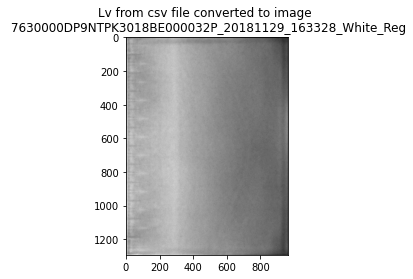

rows
643
cols
478
-----
number of white pxiels: 20233


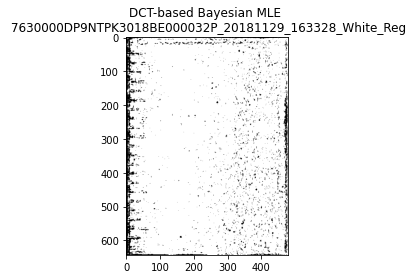

627.7584199905396


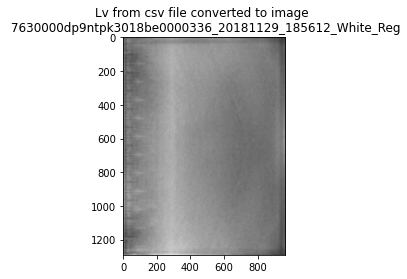

rows
642
cols
477
-----
number of white pxiels: 39815


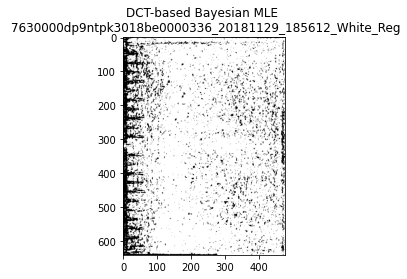

1242.9553480148315


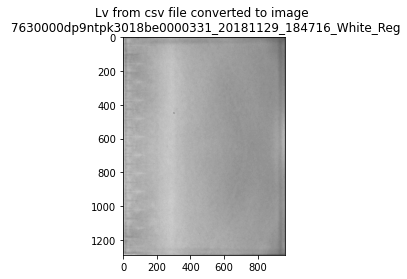

rows
641
cols
477
-----
number of white pxiels: 11029


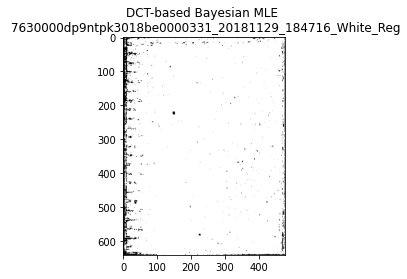

1825.170597076416


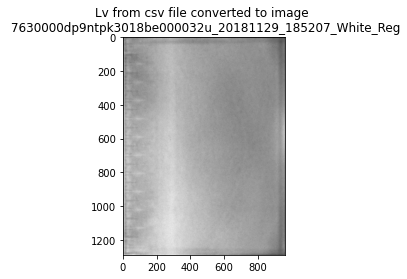

rows
641
cols
477
-----
number of white pxiels: 18661


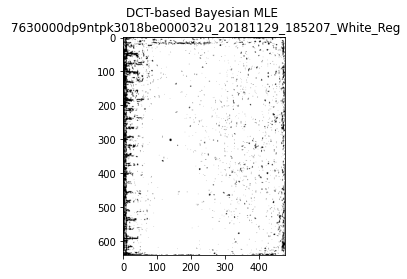

2439.353805065155


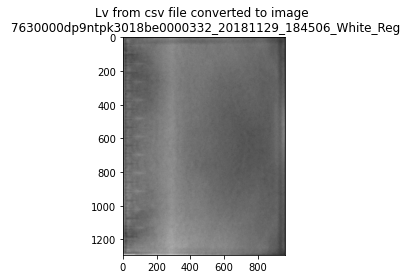

KeyboardInterrupt: 

In [86]:
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

#path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'
path = '/Users/estepark/Documents/week11_mon/Vermouth_EVT/20181129D EVT EDN1-A/20181129/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresEVT= []

for fname in glob.glob(path+'/*.csv'):
    A=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresEVT.append(sumWhite)

    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    

    end = time.time()
    print(end - start)
    

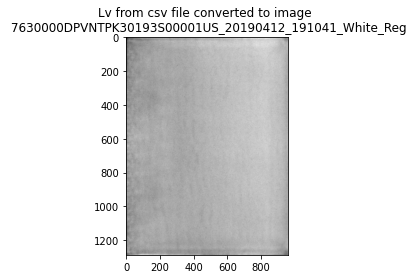

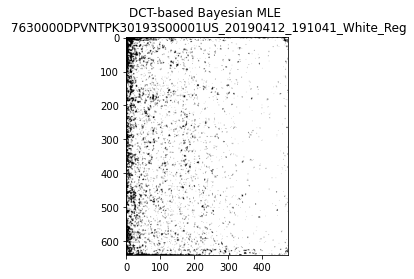

rows
640
cols
476
-----
number of white pxiels: 21943
618.9345278739929


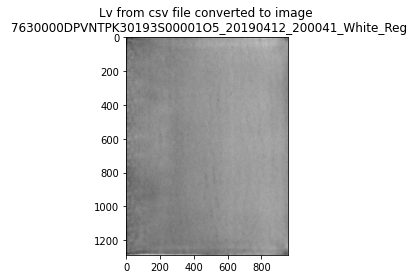

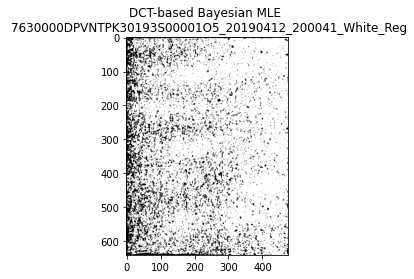

rows
640
cols
476
-----
number of white pxiels: 48946
1240.866602897644


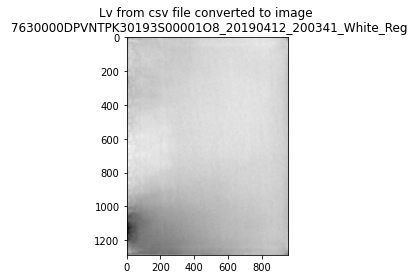

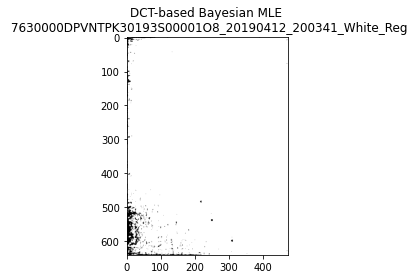

rows
640
cols
476
-----
number of white pxiels: 4712
1860.5967299938202


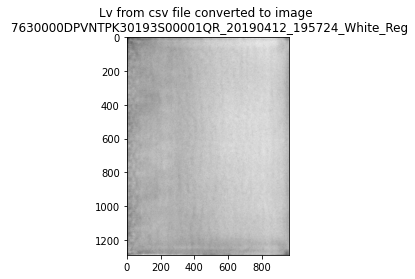

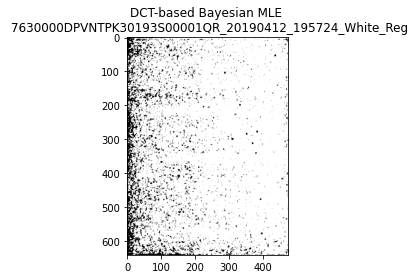

rows
641
cols
476
-----
number of white pxiels: 28190
2485.501272916794


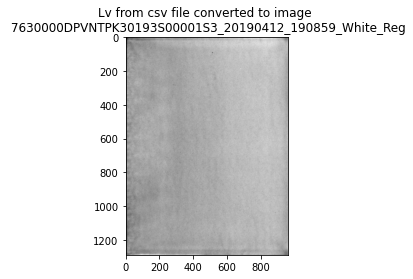

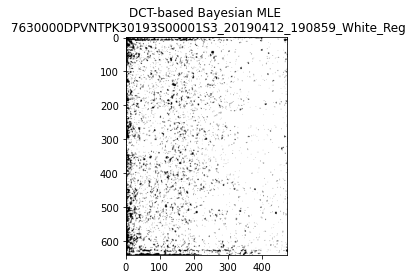

rows
641
cols
477
-----
number of white pxiels: 22429
3115.200546979904


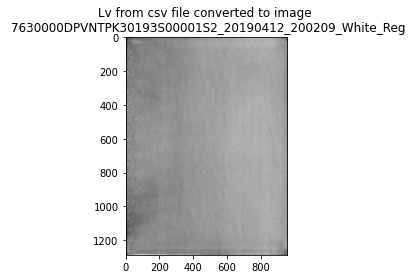

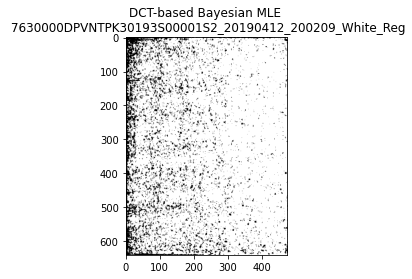

rows
640
cols
476
-----
number of white pxiels: 35773
3731.447289943695


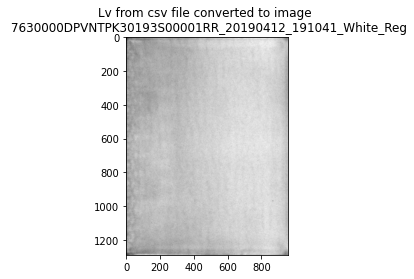

KeyboardInterrupt: 

In [94]:
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresDVT= []

for fname in glob.glob(path+'/*.csv'):
    A=[]
    sumWhite=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))


    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresDVT.append(sumWhite)

    end = time.time()
    print(end - start)
    

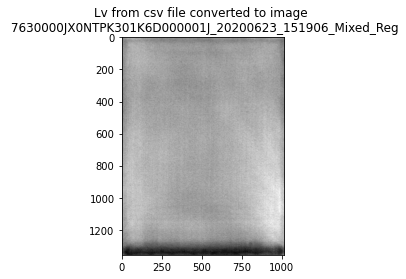

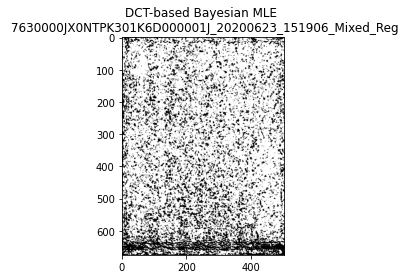

rows
675
cols
505
-----
number of white pxiels: 85517
694.0302140712738


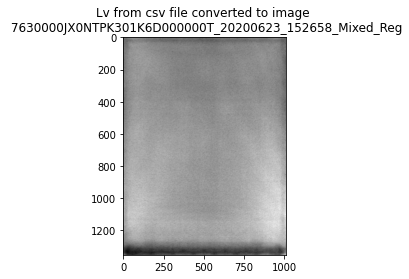

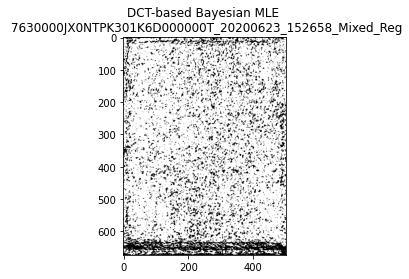

rows
673
cols
504
-----
number of white pxiels: 62583
1409.943776845932


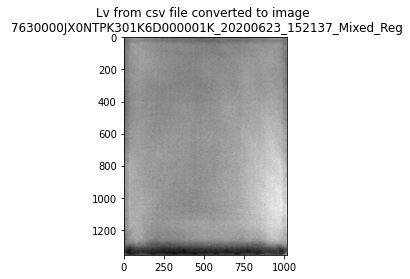

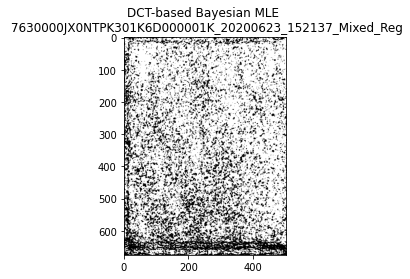

rows
675
cols
505
-----
number of white pxiels: 90332
2091.7902269363403


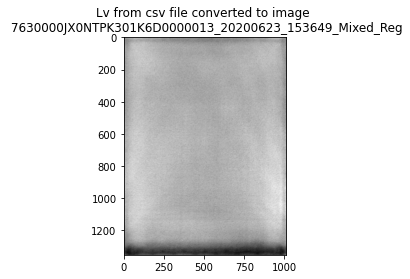

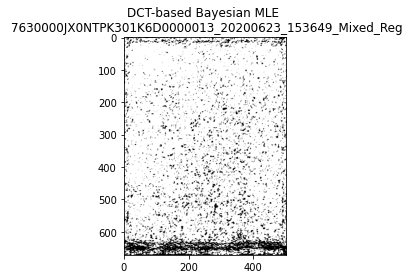

rows
672
cols
503
-----
number of white pxiels: 39835
2741.8374722003937


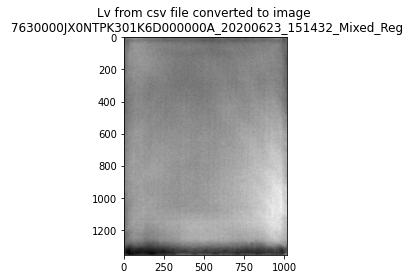

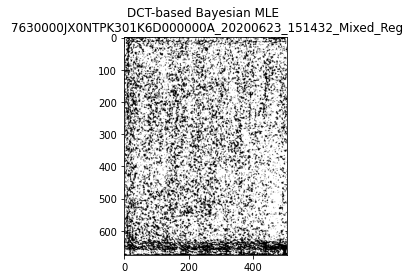

rows
675
cols
505
-----
number of white pxiels: 96710
3394.3484139442444


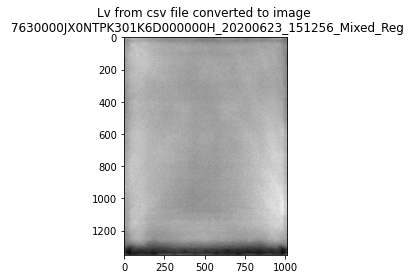

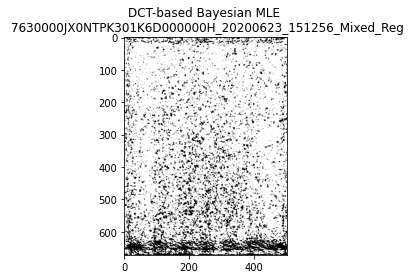

rows
672
cols
503
-----
number of white pxiels: 57535
4070.817317008972


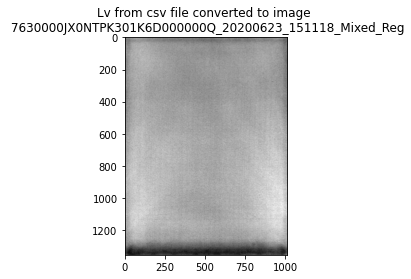

KeyboardInterrupt: 

In [95]:
#martini

path = '/Users/estepark/Documents/week11_mon/Martini_Proto3/20200623D P3 PSMC TPK/Summary_20200623D P3 PSMC TPK_20200623/Data/HiResMesh/Mixed'
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scoresDVT= []

for fname in glob.glob(path+'/*.csv'):
    A=[]
    sumWhite=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))


    plt.figure()
    plt.title("DCT-based Bayesian MLE \n {}".format(spltName))
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scoresDVT.append(sumWhite)

    end = time.time()
    print(end - start)
    